# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

In [1]:
%%capture
pip install geopandas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [2]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [3]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

In [21]:
# EDA 1
# Define a function to print basic stats

def get_basic_stats(df, name):
    print(f'--------<{name}>--------')
    print('\n----------------------------------------------------')
    print(f'{name} has {df.shape[0]} rows')
    print(f'{name} has {df.shape[1]} columns')
    print('\n----------------------------------------------------')
    print(df.info())
    print('\n----------------------------------------------------')
    print(df.describe(include='all'))
    print('\n')
    print(f'{name} has {df.duplicated().sum()} duplicated rows')
    
dfs = [denver, neighborhoods, census]
names = ['denver', 'neighborhoods', 'census']

for df, name in list(zip(dfs, names)):
    get_basic_stats(df, name)

--------<denver>--------

----------------------------------------------------
denver has 78 rows
denver has 9 columns

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreNumber  78 non-null     object 
 1   Name         78 non-null     object 
 2   PhoneNumber  77 non-null     object 
 3   Street1      78 non-null     object 
 4   Street2      15 non-null     object 
 5   Street3      11 non-null     object 
 6   PostalCode   78 non-null     int64  
 7   Longitude    78 non-null     float64
 8   Latitude     78 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ KB
None

----------------------------------------------------
         StoreNumber                            Name   PhoneNumber  \
count             78                              78            77   
un

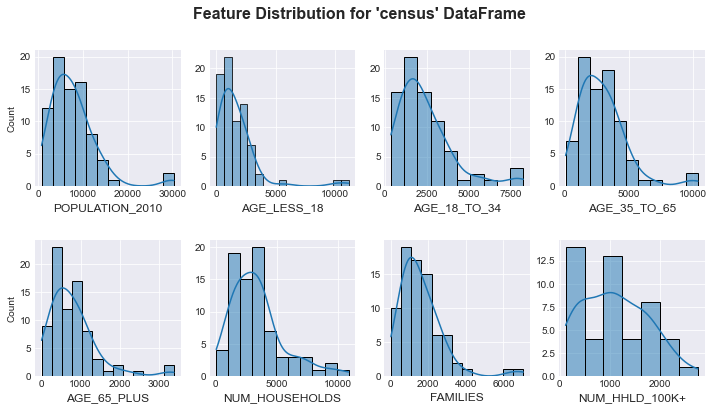

In [14]:
#EDA 2
# 2022/08/06
# Check distribution for these 8 columns in census
# 'POPULATION_2010', 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS', 'NUM_HOUSEHOLDS', 'FAMILIES', 'NUM_HHLD_100K+'

 
i = 2
j = 4
r, c = 0, 0

plt.style.use("seaborn-darkgrid")

fig, axs = plt.subplots(i, j, figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Feature Distribution for 'census' DataFrame", fontsize=16, weight='bold')
cols = census.columns
idx = 2
while r < i:
    while c < j:
        axs[r][c] = sns.histplot(census[cols[idx]], ax=axs[r][c], kde=True)
        axs[r][c].set_xlabel(cols[idx], fontsize=12)
        if c != 0:
            axs[r][c].set_ylabel("")
        c += 1
        idx += 1
    r += 1
    c = 0

# 2. Data Imputation 
### denver
* 'PhoneNumber', 'Street1', 'Street2', 'Street3', 'PostalCode' --> Delete columns
* 'StoreNumber', 'Name', 'Longitude', 'Latitude' columns have no missing values
* Some values in 'Name' have leading space --> Remove a space and check duplicates

### neighborhoods
* neighborhoods dataframe has no missing values  

### census
'POPULATION_2010', 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS', 'NUM_HOUSEHOLDS', 'FAMILIES', 'NUM_HHLD_100K+'
* 'NUM_HHLD_100K+' has 30 missing values

In [15]:
print(denver.columns)
print(neighborhoods.columns)
print(census.columns)

Index(['StoreNumber', 'Name', 'PhoneNumber', 'Street1', 'Street2', 'Street3',
       'PostalCode', 'Longitude', 'Latitude'],
      dtype='object')
Index(['NBHD_ID', 'NBHD_NAME', 'geometry'], dtype='object')
Index(['NBHD_ID', 'NBHD_NAME', 'POPULATION_2010', 'AGE_LESS_18',
       'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS', 'NUM_HOUSEHOLDS',
       'FAMILIES', 'NUM_HHLD_100K+'],
      dtype='object')


(78, 4)

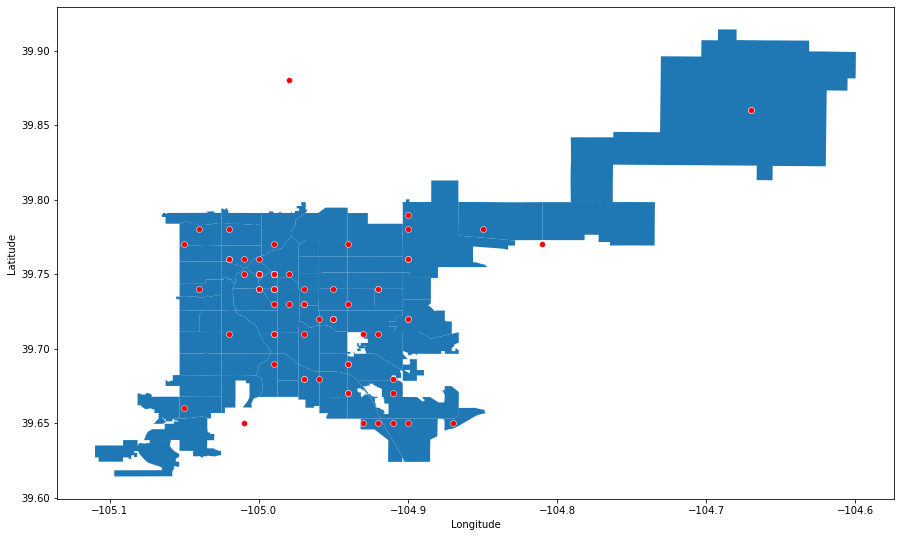

In [7]:
# Draw Denver Colorado map
fig, ax = plt.subplots(figsize=(15, 10))
denver_map = neighborhoods.plot(ax=ax)
denver_map.plot(ax=denver_map, marker='o', color='red', markersize=5)

#denver_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='red', ax=ax);

# 39.742043
# -104.991531
# crs = {'init':'EPSG:4326'}
# geometry = [gpd.Point(xy) for xy in zip(denver['Longtitude'], denver['Latitude'])]
# geo_df = gpd.GeoDataFrame(denver, 
#                           crs = crs, 
#                           geometry = geometry)
# denver_map = gpd.read_file('data/neighborhoods.shp')
# denver_map.plot()


In [8]:
# 'POPULATION_2010'

census_sorted = census.sort_values('POPULATION_2010', ascending=False)
avg_population = census_sorted['POPULATION_2010'].mean()

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 12))
plt.title("Population of City and County in Denver, Colorado", fontsize=16, weight='bold')

sns.barplot(census_sorted['POPULATION_2010'], census_sorted['NBHD_NAME'], ax=ax)
ax.axvline(avg_population, lw=1, ls='--', c='blue')
ax.set_xlabel("Population", fontsize=12, weight='bold')
ax.set_ylabel("", fontsize=12, weight='bold')
ax.text(10000, 'University Park', f"Average Population: {avg_population}");

ConversionError: Failed to convert value(s) to axis units: 'University Park'

<Figure size 576x864 with 1 Axes>

Text(0, 0.5, '')

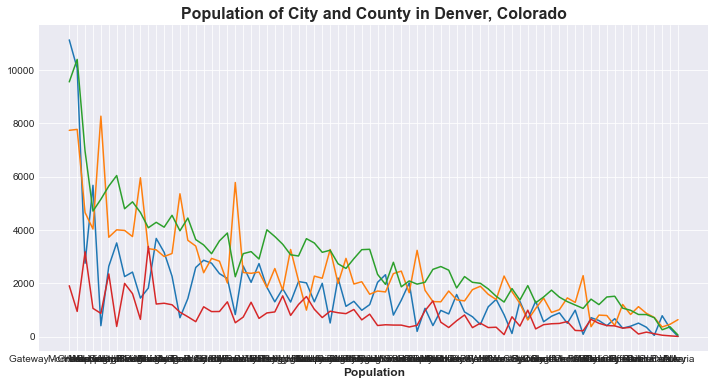

In [129]:
# Lineplot for 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS' by Name
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Population of City and County in Denver, Colorado", fontsize=16, weight='bold')

sns.lineplot(census_sorted['NBHD_NAME'], census_sorted['AGE_LESS_18'], ax=ax)
sns.lineplot(census_sorted['NBHD_NAME'], census_sorted['AGE_18_TO_34'], ax=ax)
sns.lineplot(census_sorted['NBHD_NAME'], census_sorted['AGE_35_TO_65'], ax=ax)
sns.lineplot(census_sorted['NBHD_NAME'], census_sorted['AGE_65_PLUS'], ax=ax)

#ax.axvline(avg_population, lw=1, ls='--', c='blue')
ax.set_xlabel("Population", fontsize=12, weight='bold')
ax.set_ylabel("", fontsize=12, weight='bold')
#ax.text(10000, 'University Park', f"Average Population: {avg_population}");


In [ ]:
# Plot 'NUM_HHLD_100K+'

### Note: 

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!